<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/Assignment_ANN_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Heart_Disease_Prediction.csv')

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### From Above dataset
1. Target Col "Heart Disease"  : Convert to 1 and 0 using label encoder
2. Chest pain type ---> Categories 2,3,4  : Appply OHE
3. EKG Result ---> 0 1 2  :Apply OHE
4. Slope  --> Apply OHE
5. Number of vessels fluro  -->  Apply OHE
6. Thallium --->  Apply OHE

(Those with 0 and 1 , did not apply OHE)
10. For rest columns  Age, BP. CHole, HR, Depression apply standarscaler



Before eveyrthing see if there are any missing values/ null values and completed the dataset by updating missing values



In [3]:
df.isnull().sum()

# No null values.


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
df.shape

(270, 14)

In [5]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

###StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['Age','BP', 'Cholesterol','Max HR','ST depression']]=scaler.fit_transform(df[['Age','BP', 'Cholesterol','Max HR','ST depression']])


df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3,Presence
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7,Absence
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7,Presence
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7,Absence
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3,Absence


###OHE

In [7]:
df= pd.get_dummies(df, columns =['Chest pain type','EKG results','Slope of ST','Number of vessels fluro','Thallium'])
df.head()


,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Chest pain type_1,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,1,-0.075410,1.402212,0,-1.759208,0,1.181012,Presence,0,...,0,1,0,0,0,0,1,1,0,0
1,1.382140,0,-0.916759,6.093004,0,0.446409,0,0.481153,Absence,0,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,1,-0.411950,0.219823,0,-0.375291,0,-0.656118,Presence,0,...,1,0,0,1,0,0,0,0,0,1
3,1.052186,1,-0.187590,0.258589,0,-1.932198,1,-0.743600,Absence,0,...,0,1,0,0,1,0,0,0,0,1
4,2.152032,0,-0.636310,0.374890,0,-1.240239,1,-0.743600,Absence,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
df['Heart Disease'].value_counts()  # Somewhat equivalant count so no need of upsampling here.


#Note o = Absence  1=Presence,  default asceding mapping will be applied.

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [9]:
#Convert to numeric using Label encoder


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder=preprocessing.LabelEncoder()

df['Heart Disease']=label_encoder.fit_transform(df['Heart Disease'])

df['Heart Disease'].value_counts()

## ALso count of 0s and 1s are failry equal no need to sampling

0    150
1    120
Name: Heart Disease, dtype: int64

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Heart Disease,Chest pain type_1,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,1,-0.075410,1.402212,0,-1.759208,0,1.181012,1,0,...,0,1,0,0,0,0,1,1,0,0
1,1.382140,0,-0.916759,6.093004,0,0.446409,0,0.481153,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,1,-0.411950,0.219823,0,-0.375291,0,-0.656118,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1.052186,1,-0.187590,0.258589,0,-1.932198,1,-0.743600,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.152032,0,-0.636310,0.374890,0,-1.240239,1,-0.743600,0,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
df.shape

(270, 26)

In [12]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR',
       'Exercise angina', 'ST depression', 'Heart Disease',
       'Chest pain type_1', 'Chest pain type_2', 'Chest pain type_3',
       'Chest pain type_4', 'EKG results_0', 'EKG results_1', 'EKG results_2',
       'Slope of ST_1', 'Slope of ST_2', 'Slope of ST_3',
       'Number of vessels fluro_0', 'Number of vessels fluro_1',
       'Number of vessels fluro_2', 'Number of vessels fluro_3', 'Thallium_3',
       'Thallium_6', 'Thallium_7'],
      dtype='object')

###SPLIT Train Test

In [13]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR',
       'Exercise angina', 'ST depression','Chest pain type_1', 'Chest pain type_2', 'Chest pain type_3',
       'Chest pain type_4', 'EKG results_0', 'EKG results_1', 'EKG results_2',
       'Slope of ST_1', 'Slope of ST_2', 'Slope of ST_3',
       'Number of vessels fluro_0', 'Number of vessels fluro_1',
       'Number of vessels fluro_2', 'Number of vessels fluro_3', 'Thallium_3',
       'Thallium_6', 'Thallium_7']]
y=df[ ['Heart Disease']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((216, 25), (54, 25), (216, 1), (54, 1))

##ANN


In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=25,  activation='relu')) #1st layer
model.add(Dense(16,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer

In [46]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
# Fit the model
history = model.fit(xtrain,ytrain, validation_split=0.2, epochs=150, batch_size=15)

Epoch 1/150
12/12 [==============================] - 1s 23ms/step - loss: 0.6840 - accuracy: 0.5523 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 2/150
12/12 [==============================] - 0s 5ms/step - loss: 0.6390 - accuracy: 0.5523 - val_loss: 0.6668 - val_accuracy: 0.5227
Epoch 3/150
12/12 [==============================] - 0s 7ms/step - loss: 0.6084 - accuracy: 0.5756 - val_loss: 0.6363 - val_accuracy: 0.5227
Epoch 4/150
12/12 [==============================] - 0s 7ms/step - loss: 0.5844 - accuracy: 0.6279 - val_loss: 0.6080 - val_accuracy: 0.5682
Epoch 5/150
12/12 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.6919 - val_loss: 0.5853 - val_accuracy: 0.5909
Epoch 6/150
12/12 [==============================] - 0s 6ms/step - loss: 0.5522 - accuracy: 0.7384 - val_loss: 0.5635 - val_accuracy: 0.5909
Epoch 7/150
12/12 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.7674 - val_loss: 0.5450 - val_accuracy: 0.6136
Epoch 8/150


In [48]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

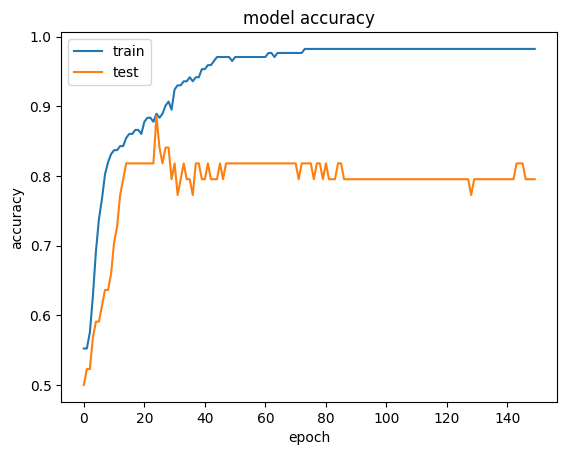

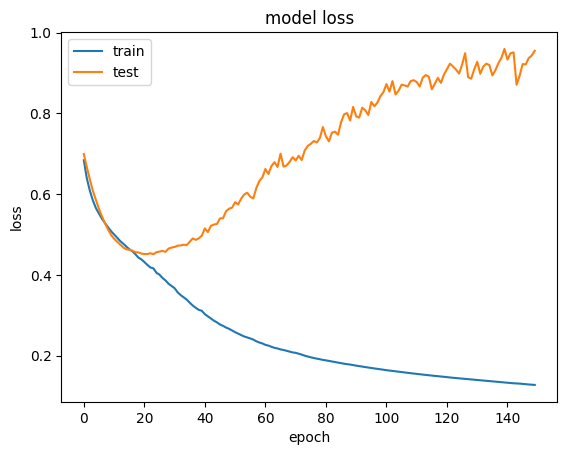

In [49]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# evaluate the model
scores = model.evaluate(xtest, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.5327 - accuracy: 0.8704
accuracy: 87.04%
